In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd 
import numpy as np 
import os
import re

In [2]:
df= pd.read_excel("fine.xlsx")
df.head()

,LABEL,cleaned
0,EP,You are very beautiful
1,EP,Nice
2,EP,Nice video jitu bhai
3,EP,Super
4,EP,Supar comedy


In [3]:
from io import StringIO
col = ['LABEL', 'cleaned']
df = df[col]
df = df[pd.notnull(df['cleaned'])]
df.columns = ['LABEL', 'cleaned']
df['category_id'] = df['LABEL'].factorize()[0]
category_id_df = df[['LABEL', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'LABEL']].values)
df.head()

,LABEL,cleaned,category_id
0,EP,You are very beautiful,0
1,EP,Nice,0
2,EP,Nice video jitu bhai,0
3,EP,Super,0
4,EP,Supar comedy,0


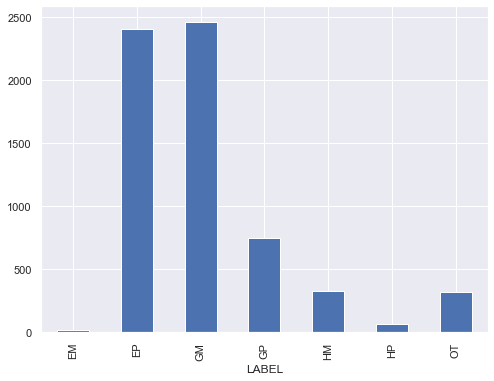

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('LABEL').cleaned.count().plot.bar(ylim=0)
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df.cleaned).toarray()
labels = df.category_id
features.shape

(6341, 1434)

In [6]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'EM':
  . Most correlated unigrams:
. પર
. पर
  . Most correlated bigrams:
. nice song
. himesh reshamiya
# 'EP':
  . Most correlated unigrams:
. super
. nice
  . Most correlated bigrams:
. very nice
. nice song
# 'GM':
  . Most correlated unigrams:
. nice
. ha
  . Most correlated bigrams:
. moj ha
. ha moj
# 'GP':
  . Most correlated unigrams:
. કર
. જર
  . Most correlated bigrams:
. ખર ખર
. રણ કન
# 'HM':
  . Most correlated unigrams:
. he
. hai
  . Most correlated bigrams:
. modi ko
. ke liye
# 'HP':
  . Most correlated unigrams:
. एक
. नह
  . Most correlated bigrams:
. very nice
. nice song
# 'OT':
  . Most correlated unigrams:
. ðÿ
. àª
  . Most correlated bigrams:
. ðÿ ðÿ
. àª àª


In [7]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['LABEL'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [8]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['EP']


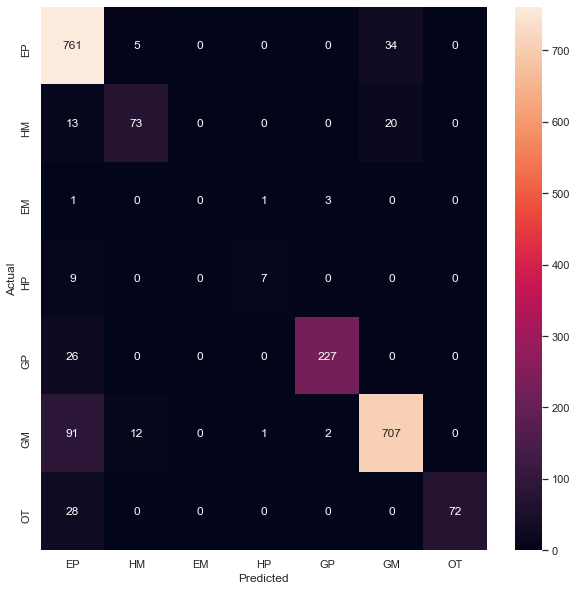

In [9]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.LABEL.values, yticklabels=category_id_df.LABEL.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [10]:
df= pd.read_excel("fine.xlsx")
df.head()

,LABEL,cleaned
0,EP,You are very beautiful
1,EP,Nice
2,EP,Nice video jitu bhai
3,EP,Super
4,EP,Supar comedy


In [11]:
df.shape

(6341, 2)

In [12]:
df.columns = ['LABEL', 'cleaned']
print(df.isnull().any())
display(df.head(10))

LABEL      False
cleaned    False
dtype: bool


,LABEL,cleaned
0,EP,You are very beautiful
1,EP,Nice
2,EP,Nice video jitu bhai
3,EP,Super
4,EP,Supar comedy
5,EP,nice video
6,EP,Excellent jokes JITU and mungu
7,EP,Kumkumbhagya the same
8,EP,Nice
9,EP,really nice acting 0027616164465 south Africa


In [13]:
fig = plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

In [14]:
Y = df['LABEL'].values
X = df['cleaned'].values

In [15]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [16]:
# Make Machine Learning Pipeline with TfidfVectorizer and MultinomialNB
from sklearn.svm import SVC
tfidf_vect = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
model = SVC(kernel = 'rbf')
text_clf = Pipeline([('tfidf', tfidf_vect),
                    ('clf', model),])

In [17]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [18]:
predictions = text_clf.predict(X_test)
predictions

array(['EP', 'GM', 'GP', ..., 'EP', 'GM', 'GM'], dtype=object)

In [19]:
# Measure accuracy
accuracy_score(y_test,predictions)

0.9201261166579086

In [20]:
# alternate train and test set through cross validation to yield a more trustworthy accuracy
scores = cross_val_score(text_clf, X, Y, cv=5)
print("Mean cross-validation accuracy: " + str(scores.mean()))

Mean cross-validation accuracy: 0.9001720224822446


In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          EM       0.00      0.00      0.00         3
          EP       0.91      0.95      0.93       733
          GM       0.90      0.92      0.91       735
          GP       0.99      0.99      0.99       233
          HM       0.91      0.53      0.67        95
          HP       0.77      0.53      0.62        19
          OT       0.99      0.98      0.98        85

    accuracy                           0.92      1903
   macro avg       0.78      0.70      0.73      1903
weighted avg       0.92      0.92      0.92      1903



In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.LABEL.values, yticklabels=category_id_df.LABEL.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [1903, 2093]

In [ ]:
txt= ['congresh ni ak दीधी',
      'maru name kazi zuber chhe',
      'nice',
      'mera name kya he',
      'ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜']

pred = text_clf.predict(txt)
for i in pred :
        print(i)